<a href="https://colab.research.google.com/github/HieuTran26/BRAF_PredictionModel/blob/main/PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Libraries and Necessary Files**

In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
load_data = pd.read_table("example.txt", sep=' ', header=None)
load_data.to_csv('molecule.smi', sep = '\t', header = False, index = False)

In [3]:
! bash padel.sh

Processing CHEMBL3819677 in molecule.smi (1/3). 
Processing CHEMBL1184572 in molecule.smi (2/3). 
Processing CHEMBL1205352 in molecule.smi (3/3). 
Descriptor calculation completed in 0.528 secs . Average speed: 0.18 s/mol.


# **Building Prediction Model**

In [4]:
df = pd.read_csv('BRAF_data_05.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.795880
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.045757
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.799971
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.469800
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.886057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.764472
4896,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.154902
4897,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.124939
4898,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.928118


In [5]:
X = df.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4896,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4897,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4898,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = df.iloc[:,-1]
Y

0       4.795880
1       6.045757
2       5.799971
3       6.469800
4       7.886057
          ...   
4895    6.764472
4896    6.154902
4897    9.124939
4898    6.928118
4899    6.113509
Name: pIC50, Length: 4900, dtype: float64

In [7]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,PubchemFP143,...,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP812,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP833
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4896,1,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4897,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4898,1,1,0,1,0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=1)

In [9]:
X.to_csv('descriptor_list.csv', index = False)

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit( X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [11]:
r2 = model.score(X, Y)
r2

0.8067670025911153

MSE err and r2 score for validation

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("training mse:", mse_train)

training mse: 0.212125256043413


In [14]:
y_val_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("validation mse:", mse)
print("validation r2 score:", r2)

validation mse: 0.9405522349783871
validation r2 score: 0.49869912022754503


# **Predicting Input Example**

In [15]:
df_predict = pd.read_csv('descriptors_output.csv')
df_predict

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1205352,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3819677,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1184572,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_data = pd.read_csv('descriptor_list.csv')
df_data

,PubchemFP2,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,PubchemFP143,...,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP812,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP833
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4896,1,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4897,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4898,1,1,0,1,0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [17]:
XList = df_data.columns
XList

Index(['PubchemFP2', 'PubchemFP16', 'PubchemFP17', 'PubchemFP19',
       'PubchemFP20', 'PubchemFP23', 'PubchemFP24', 'PubchemFP33',
       'PubchemFP37', 'PubchemFP143',
       ...
       'PubchemFP784', 'PubchemFP797', 'PubchemFP798', 'PubchemFP800',
       'PubchemFP805', 'PubchemFP812', 'PubchemFP818', 'PubchemFP819',
       'PubchemFP821', 'PubchemFP833'],
      dtype='object', length=215)

In [18]:
input_data = df_predict[XList]
input_data

,PubchemFP2,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,PubchemFP143,...,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP812,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP833
0,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0


In [19]:
prediction = model.predict(input_data)

In [20]:
prediction_output = pd.Series(prediction, name='pIC50')
molecule_name = pd.Series(load_data[1], name='molecule_name')
df = pd.concat([molecule_name, prediction_output], axis=1)

with open('output.txt', 'w') as f:
    f.write(df.to_string(index=False))
    f.write('\n')

df

,molecule_name,pIC50
0,CHEMBL3819677,6.378960
1,CHEMBL1184572,5.551616
2,CHEMBL1205352,5.926494


# **Heatmap/Confusion Matrix Libs**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, confusion_matrix

Put pIC50 into bins

In [22]:
# Don't know what values to expect so going from 0-10
def bin_values(values, bins=[0, 5, 7, 10], labels=["Low", "Medium", "High"]):
    return pd.cut(values, bins=bins, labels=labels, include_lowest=True)

actual_binned = bin_values(df['pIC50'])
predicted_binned = bin_values(prediction)

Confusion Matrix

In [23]:
cm = confusion_matrix(actual_binned, predicted_binned, labels=["Low", "Medium", "High"])

Heatmap

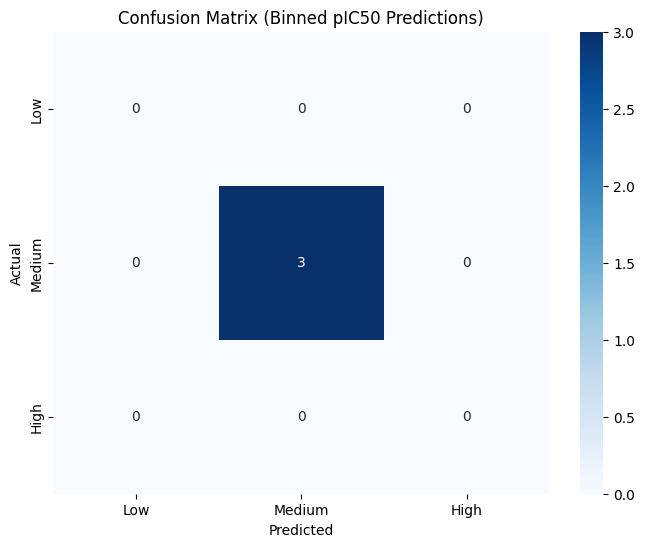

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix (Binned pIC50 Predictions)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

Abs err and squared err

In [25]:
mae = mean_absolute_error(df['pIC50'], prediction)
mse = mean_squared_error(df['pIC50'], prediction)

with open('output.txt', 'a') as f:
    f.write(f'Mean Absolute Error: {mae}\n')
    f.write(f'Mean Squared Error: {mse}\n')

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
